# **MANEJO DE FICHERO DE DATOS**

**https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/version/7?select=Medals.xlsx**

**https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo**

In [2]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/2023/Publica/Alumnos/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.path.dirname(os.path.abspath('Medallas')) + "/"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename = data_dir + "Medals.xlsx"

df = pd.read_excel(filename)

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [98]:
df.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [100]:
df['Pais']=df['Team/NOC']
df.drop(['Team/NOC'],axis=1,inplace=True)


In [101]:
df=df.set_index('Pais')

In [102]:
df.sort_values('Rank')
df = df[:10]

In [105]:
df=df.reset_index()
df["Pais"] = df["Pais"].str.replace("United States of America", "EEUU")
df["Pais"] = df["Pais"].str.replace("People's Republic of China", "China")

In [109]:
df=df.set_index('Pais')

[Text(1, 0, 'EEUU'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'Great Britain'),
 Text(5, 0, 'ROC'),
 Text(6, 0, 'Australia'),
 Text(7, 0, 'Netherlands'),
 Text(8, 0, 'France'),
 Text(9, 0, 'Germany'),
 Text(10, 0, 'Italy')]

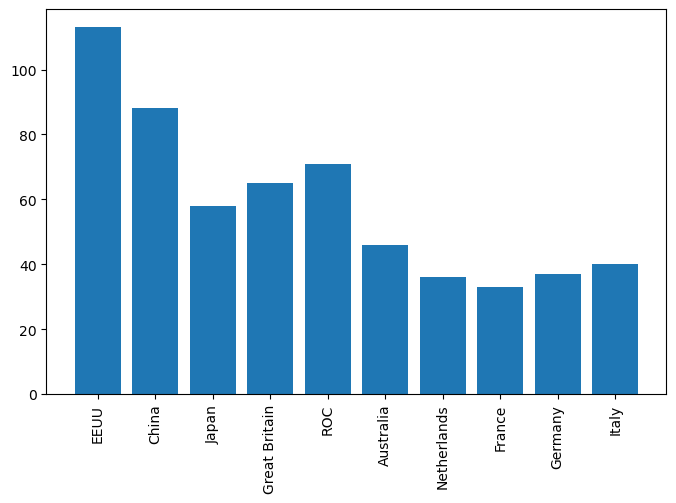

In [110]:
fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(1,1,1)
ax.bar(df['Rank'],df['Total'])
ax.set_xticks(df["Rank"])
ax.set_xticklabels(df.index,rotation=90)

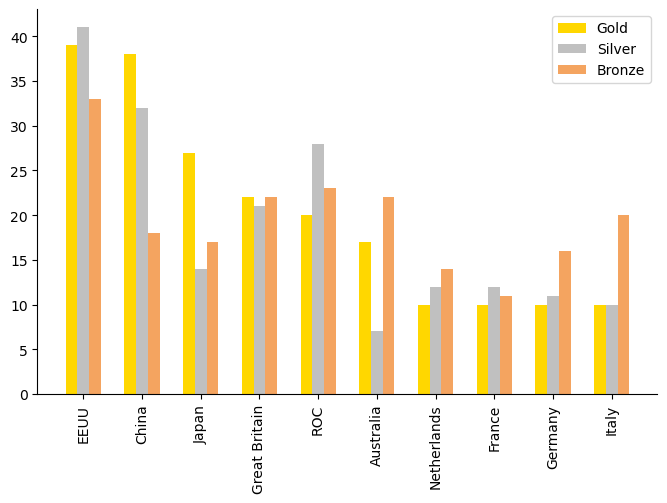

In [119]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ancho = 0.2
ax.bar(df["Rank"]-ancho, df["Gold"], ancho,color='gold',label='Gold')
ax.bar(df["Rank"], df["Silver"], ancho,color='silver',label='Silver')
ax.bar(df["Rank"]+ancho, df["Bronze"], ancho,color='sandybrown',label='Bronze')

ax.set_xticks(df["Rank"])
ax.set_xticklabels(df.index, rotation=90)


ax.legend()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
